In [0]:
# 다양한 머신러닝 알고리즘을 이용.
# 교차검증 방식으로 모델을 훈련시키고 예측 정확도를 평가해 줌

import sklearn
import image
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.datasets import load_boston
from sklearn.datasets import load_diabetes
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import load_digits
from sklearn.datasets import fetch_lfw_people
from sklearn.datasets import make_blobs
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn.base import BaseEstimator
from sklearn.datasets import load_digits

# predictive modeling 계열 (의사결정나무, 랜덤포레스트, 로지스틱 회귀, Knearest 등) <- Kmeans 어따 빼먹음
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# 모델 검증 관련 (정확도)
from sklearn.metrics import accuracy_score

# preprocessing (전처리) 그룹
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler 
from sklearn.preprocessing import LabelEncoder



# pandas 출력 설정 : 출력시 가로 생략 없애기
# pd.set_option('display.max_columns', 50)
# pd.set_option('display.width',250)
pd.set_option('display.expand_frame_repr', False) 
# 바로 위 1줄이면 그 위위 2줄과 동일

from sklearn.base import BaseEstimator

from sklearn.metrics import confusion_matrix # 혼동행렬
from pandas.plotting import scatter_matrix


from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge


# import mglearn <------------ 확인 필요. 오류남


# score류 (predictive modeling을 평가하는 지표)
from sklearn.metrics import accuracy_score # 정확도
from sklearn.metrics import precision_score # 정밀도
from sklearn.metrics import recall_score # 민감도(재현율)
from  sklearn.metrics import f1_score # F1 스코어 (정밀도, 민감도 조화평균..)
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import r2_score

from sklearn.metrics import mean_squared_error

# ROC

# Receiver Operation Characteristics Curve
# 수신자 판단 곡선

# 세계 2차 대전 통신 장비 성능 평가를 위해 고안된 수치
# 의학분야에 많이 사용되지만, 머신러닝의 이진 분류 모델 예측 성능 평가에도 사용

# 특이도(FPR)가 변할 때 민감도가 어떻게 변하는지 알아보기 위한 곡선

# 환자 중 보균자p/정상인n 있는 경우
# 재현율 : 보균자를 보균자로 양성 판정
# 특이도 : 정상인을 정상인으로 음성 판정

# -_-;;; -------------------------------------------------------------------------------


# AUC 

# Area Under Curve
# ROC 곡선 밑의 면적을 구한 값
# 1에 가까울수록 좋은 수치를 의미함


## 리지, 라쏘 회귀 - 과적합을 피하기 위함

# 가중치에 계약조건을 설정해서 회귀를 구하는 알고리즘
# 이를 통해 모델의 복잡도를 다소 낮춰 적당한 편향/분산을 통해
# 적절한 회귀모델을 구함

# 일반적인 회귀분석 : 회귀계수 추정량을 구함
# 잔차의 제곱합을 최소로 하는 최소제곱법 사용

# 실제 회귀모델은 단일변수가 아닌 다중변수가 많음

# 독립변수 증가 => 변수간 강한 상관관계 => 다중공선성 문제 발생
# => 최소제곱법을 이용한 회귀계수 추정량이 커짐 => 정확도 저하

# 따라서, 중요한 변수를 선정하고, 중요하지 않은 변수는 제외
# => 변수선택(feature selection)
# 중요하지 않은 변수에 해당하는 계수 절대값을 낮춤



## 라쏘회귀(L1 패널티)
# 원래의 최소제곱법에 제약을 가함
# 중요하지 않은 변수의 계수는 축소 => 0으로 설정
# 기울기를 완전히 줄여 특정 특성이 모델에 주는 영향을 제외시킴


## 리지회귀(L2 패널티)
# 원래의 최소제곱법에 제약을 가함
# 중요하지 않은 변수의 계수는 축소 => 0에 가깝게 설정
# 기울기를 다소 줄여 특정 특성이 모델에 주는 영향을 축소시킴


## 엘라스틱넷 회귀
# 라쏘회귀와 리지회귀의 제약을 합친 모형

from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge


In [42]:
# iris 데이터셋을 이용한 로지스틱 회귀
# 4+1변수, 150개의 데이터로 구성
# 결과값은 3가지 : setosa/versicolor/verginica

iris = load_iris()

#print(iris.target)
#print(iris.data.head
#print(iris.feature_names)
#print(iris.DESCR)

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=1907051130) #split비율 미지정시 7.5 : 2.5?!
lgr = LogisticRegression(solver='saga', # liblinear, sag, saga 등이 무난 -_-;;
                         multi_class='multinomial', # 종속변수가 2개 초과일 때
                        C=0.01) 

clf = lgr.fit(X_train, y_train)
pred = lgr.predict(X_test)

print('훈련 정확도', clf.score(X_train, y_train))
#print('훈련 정확도', clf.score(pred, y_test))
print('정확도', accuracy_score(pred, y_test))

훈련 정확도 0.9196428571428571
정확도 0.7894736842105263


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[1 1 1 ... 2 2 2]


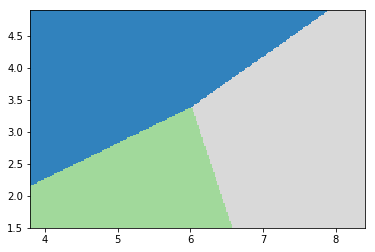

훈련 정확도 0.82


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [58]:
# 결정경계 시각화를 위해 iris 특성을 2개로 나눠 재학습

#print(iris.data)

data = iris.data
#print(data[:, 0]) # 1열 데이터 전체행

# 다항로지스틱 회귀시 결정경계 시각화

# x축 최소/최대
x_min = data[:, 0].min() - 0.5
x_max = data[:, 0].max() + 0.5

# y축 최소/최대
y_min = data[:, 1].min() - 0.5
y_max = data[:, 1].max() + 0.5

# 예측값으로 이용할 데이터 범위 지정
xm = np.arange(x_min, x_max, 0.02)
ym = np.arange(y_min, y_max, 0.02)
xx, yy = np.meshgrid(xm, ym)
# 좌표 쌍 생성 : meshgrid()
# 변수가 2개인 2차원 함수의 그래프를 그리려면 2차원 영역에 대한 좌표값의 쌍이 필요
# 즉, x:0~2, y:0~4인 두 변수의 좌표값 쌍은..
# x : 0 1 2
# y : 0 1 2 3

# (0 0) (0 1) (0 3) (1 0) (1 1) (1 ...


# 설정한 데이터 범위를 이용해서 예측값 조사
results = logr.predict(np.c_[xx.ravel(), yy.ravel()])

# 예측값에 따라 적절한 색상 지정
results = results.reshape(xx.shape)
plt.pcolormesh(xx, yy, results, cmap=plt.cm.tab20c)
# 그 결과 자연스레 경계가 표시됨

# 분석결과를 산점도로 그림
#plt.scatter(data[:,0], data[:,1], c=target, cmap=plt.cm.tab20c, edgecolors='k')
plt.show()



data = iris.data[:, :2] # Sepal 속성 2개만 (앞 2개 열)
#data = iris.data[:, 2:] # Petal 속성 2개만 (앞 2개 열)

#print(data)

# 시각화를 위해 두 컬럼만 지정
target = iris.target

logr = LogisticRegression(solver='saga', # liblinear, sag, saga 등이 무난 -_-;;
                         multi_class='multinomial') # 종속변수가 2개 초과일 때
                        #C=0.01) 

logr.fit(data, target)

print('훈련 정확도', logr.score(data, target)) # 굳이 split 안 시키고 바로

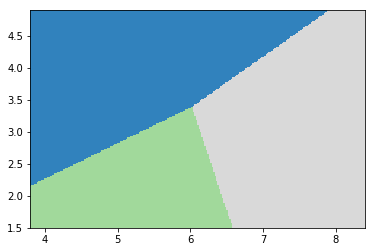

In [54]:
results = logr.predict(np.c_[xx.ravel(), yy.ravel()])
# 설정한 데이터 범위를 이용해서 예측값 조사

results = results.reshape(xx.shape)
plt.pcolormesh(xx, yy, results,
              cmap=plt.cm.tab20c)
# 예측값에 따라 적절한 색상 지정

#plt.scatter(data[:,0], data[:,1], c=target,
#           cmap=plt.cm.tab20c, edgecolors='k')

plt.show()

In [70]:
print(np.zeros(5)) # 0으로 채워진 배열
print(np.ones(5)) # 1로 채워진 배열
print(np.arange(5)) # 0에서 n-1 까지 수로 채워진 배열
print(np.arange(0,5,0.5)) # 0에서 n-1 까지 수로 채워진 배열 / 뒷 argument는 간격임

print(np.linspace(0,10,5)) # a~b까지 범위를 n등분

[0. 0. 0. 0. 0.]
[1. 1. 1. 1. 1.]
[0 1 2 3 4]
[0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5]
[ 0.   2.5  5.   7.5 10. ]


---------------------
[0 1]
---------------------
[15 16 17 18 19]
---------------------
[[0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]]
---------------------
[[15 15]
 [16 16]
 [17 17]
 [18 18]
 [19 19]]
---------------------


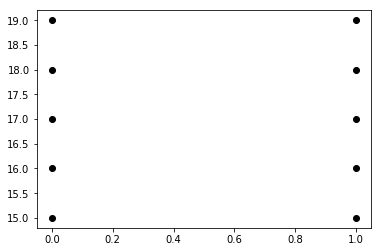

In [88]:
x = np.arange(2)
y = np.arange(15,20)
xx, yy = np.meshgrid(x, y)

Z = [list(zip(x,y)) for x,y in zip(xx,yy)]
#print(Z)
print('---------------------')
print(x)
print('---------------------')
print(y)
print('---------------------')
print(xx)
print('---------------------')
print(yy)
print('---------------------')


#plt.plot(x, y, 'ko')
#plt.show()

plt.plot(xx, yy, 'ko')
plt.show()

In [0]:
# 칼라맵 plt.cm.Paired
# matplotlib colormap

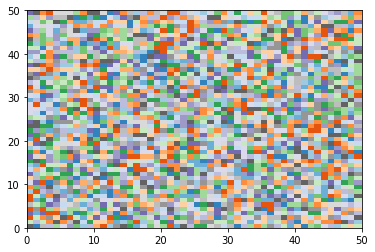

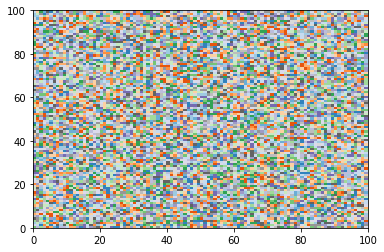

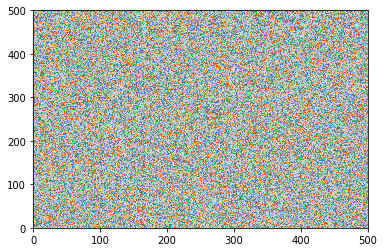

In [99]:
# pcolormesh
# 내장된 칼라맵을 이용해서 히트맵을 그려주는 함수

rand = np.random.rand(50,50)
#print(rand) #20개 난수 생성
plt.pcolormesh(rand, cmap=plt.cm.tab20c)
plt.show()

rand = np.random.rand(100,100)
#print(rand) #20개 난수 생성
plt.pcolormesh(rand, cmap=plt.cm.tab20c)
plt.show()

rand = np.random.rand(500,500)
#print(rand) #20개 난수 생성
plt.pcolormesh(rand, cmap=plt.cm.tab20c)
plt.show()

In [100]:
# 로지스틱 회귀/분류 분석 ---------------------------------------------------------------------------------------  아래부터 이욱 필기
# 주로 분류를 하기 위한 알고리즘
# 주로 예0/아니오1 등의 이진분류에 많이 사용
# 의료, 통신, 데이터마이닝 분야의 회귀/분류를 위한 예측모델로 활용


# 머신러닝 교육자료 패키지
# 안드레아스 뮐러가 쓴 책의 그래프와 데이터셋을 손 쉽게 다루기 위한 패키지
# 파이썬 라이브러리를 활용하 머신러닝
# pip install mglearn


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression


from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

import mglearn

# pandas 출력 설정 : 출력시 가로 생략 없애기
# pd.set_option('display.max_columns', 50)
# pd.set_option('display.width',250)
pd.set_option('display.expand_frame_repr', False)

# 간단한 데이터셋 생성
X, y = mglearn.datasets.make_forge()

# 산점도를 이용해서 시각화
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

# 로지스틱회귀 분석
logr = LogisticRegression()
clf = logr.fit(X, y)
print('R2 측정값', clf.score(X, y)) # 0.9230769230769231

# 결정계수 시각화
mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, alpha=0.7)
plt.show()



# 선형회귀분석 오류
# 곤충의 질량에 따라 암수를 구분 하는 모델 행성
X=np.array([1.94,1.67,0.92,1.11,1.41,1.65,2.28,0.47,1.07,2.19,2.08,1.02,0.91,
            1.16,1.46,1.02,0.85,0.89,1.79,1.89,0.75,0.9,1.87,0.5,0.69,1.5,0.96,
            0.53,1.21,0.6])
y=np.array([1,1,0,0,1,1,1,0,0,1,1,0,0,0,1,0,0,0,1,1,0,1,1,0,0,1,1,0,1,0])
X = X.reshape(-1, 1)
y = y.reshape(-1, 1)

# 암수 출력
X[y == 0] # 암컷
X[y == 1] # 수컷


# 데이터 시각화
plt.plot(X, y, 'ro')
plt.grid(True)
plt.show()

plt.scatter(X, y, c=y)
plt.axvline(x=1.1, color='r', linestyle='--')
plt.axvline(x=1.2, color='b', linestyle='-.')
plt.grid(True)
plt.show()

# 선형회귀분석으로 회귀계수 계산
lr = LinearRegression()
lr.fit(X, y)
print('회귀계수', lr.coef_, lr.intercept_) #  [[0.74825276]] [-0.43007818]

# 선형회귀선 표시
x = np.linspace(0, 2.5, 50)
yy = x*lr.coef_+lr.intercept_

plt.scatter(X, y, c=y)
plt.axvline(x=1.2, color='r', linestyle='--')
plt.plot(x.reshape(-1, 1), yy.reshape(-1, 1), color='b')
plt.grid(True)
plt.show()


# 선형방정식은 이항분포를 따르는 데이터에 적용하기에는 다소 맞지 않음
# 즉, 우변값의 법위는 '-무한대~ +무한대' 이지만 좌변값의 범위는 '0 ~ 1'임
# 따라서, 좌변값의 범위를 우변과 동일하게 '-무한대 ~ +무한대'로 하려면
# 적절한 변환함수가 필요
# => 로짓logit함수를 이용해서 변환함

def logistic(x, w):
    yy = 1 / (1 + np.exp(-(w[0]*x + w[1])))
    return yy

# 로짓함수를 이용해서 그래프 다시 생성
W = [8, -10]
x = np.linspace(0, 2.5, 50)
yy = logistic(x, W)
plt.plot(x.reshape(-1,1), yy.reshape(-1,1), color='gray')
plt.plot(X, y, 'ro')
# 결정경계 표시
i = np.min(np.where(y > 0.5)) # y 중 0.5가 되는 지점 찾음
xx = (x[i-1] + x[i]) / 2
# y가 0.5일때 x의 지점을 찾음
plt.plot([xx,xx],[-.5, 1.5], 'b--')
plt.grid(True)
plt.show()

print('x의 결정경계값', xx)



# 로지스틱 회귀로 유방암 진단 분석하기
# 위스콘신 대학 유방암 진단 데이터
# 30+1변수, 569개의 데이터로 구성
# 반경, 질감, 둘레, 면적, 매끄러움, 크기, 오목함, 대칭여부, 3차원진단,
# 각종 통계수치(평균, 표준편차, 최악에 대한 평균)
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
print(cancer.data)
print(cancer.target)
print(cancer.feature_names)
print(cancer.DESCR)

# 학습/평가 데이터 분리
X_train, X_test, y_train, y_test = \
    train_test_split(cancer.data, cancer.target, random_state=1907051100) # 7.5 : 2.5

lgr = LogisticRegression(solver='liblinear', C=0.001)
# solver : sklearn 20.x 이상부터는 명시적 지정 필요
# liblinear : 이항회귀, 작은 데이터셋에 적합
# lbfgs, newton-cg : 다항회귀, L1제약
# sag, saga : 다항회귀, L2제약, 확률적 평균 경사하강법 사용
# C : 규제 매개변수, 값이 커지면 규제강도 증가

clf = lgr.fit(X_train, y_train)
pred = lgr.predict(X_test)
print('정확도', accuracy_score(pred, y_test)) # 0.9370629370629371



# iris 데이터셋을 이용한 로지스틱 회귀
# 4+1변수, 150개의 데이터로 구성
# 결과값은 3가지 : setosa, versicolor, verginica
from sklearn.datasets import load_iris

iris = load_iris()
print(iris.data)
print(iris.target)
print(iris.feature_names)
print(iris.DESCR)

# 학습/평가 데이터 분리
X_train, X_test, y_train, y_test = \
    train_test_split(iris.data, iris.target, random_state=1907051130) # 7.5 : 2.5

lgr = LogisticRegression(solver='saga', C=0.01, multi_class='multinomial') # multi_class='auto'
# solver : sklearn 20.x 이상부터는 명시적 지정 필요
# liblinear : 이항회귀, 작은 데이터셋에 적합
# lbfgs, newton-cg : 다항회귀, L1제약
# sag, saga : 다항회귀, L2제약, 확률적 평균 경사하강법 사용
# C : 규제 매개변수, 값이 커지면 규제강도 증가

clf = lgr.fit(X_train, y_train)
pred = lgr.predict(X_test)
print('정확도', accuracy_score(pred, y_test)) # 0.7894736842105263


# 결정경계 시각화를 위해 iris특성을 2개로 나눠 재학습

# 시각화를 위해 두컬럼(0,1)만 지정
data = iris.data[:, :2] # Sepal 속성만
# data = iris.data[:, 2:] # Peral 속성만
target = iris.target

logr = LogisticRegression(solver='saga', multi_class='multinomial')

logr.fit(data, target)

print('훈련 정확도', logr.score(data, target)) # 0.82


# 다항로지스틱 회귀시 결정경계 시각화

# x축 최소/최대
x_min = data[:, 0].min() - 0.5
x_max = data[:, 0].max() + 0.5

# y축 최소/최대
y_min = data[:, 1].min() - 0.5
y_max = data[:, 1].max() + 0.5

# 예측값으로 이용할 데이터 범위 지정
xm = np.arange(x_min, x_max, 0.02)
ym = np.arange(y_min, y_max, 0.02)
xx, yy = np.meshgrid(xm, ym)

# 설정한 데이터 범위를 이용해서 예측값 조사
results = logr.predict(np.c_[xx.ravel(), yy.ravel()])

# 분석결과를 산점도로 그림

# 예측값에 따라 경계를 구분하고 적절한 색상으로 표시
results = results.reshape(xx.shape)
plt.pcolormesh(xx, yy, results, cmap=plt.cm.tab20c)

# 원본데이터를 산점도로 표시
plt.scatter(data[:,0], data[:,1], c=target, cmap=plt.cm.tab20c, edgecolors='k')
plt.show()


# 위 예제에 사용된 numpy, matplotlib 함수 알아보기
# 배열생성 : zeros, ones, arange, linspace
np.zeros(5) # 0으로 채워진 배열
np.ones(5) # 1으로 채워진 배열
np.arange(5) # 0 ~ 5-1(n-1) 까지의 수로 채워진 배열
np.arange(0, 5, 0.5) # 0 ~ 5(n)전 까지의 범위를 0.5간격으로 채운 배열
np.linspace(0,10,5) # 0(a) ~ 10(b) 까지의 범위를 5(n)등분

# 좌표 쌍을 생성 : meshgrid
# 변수가 2개인 2차원 함수의 그래프를 그릴려면 2차원 영역에 대한 좌표값의 쌍이 필요
# 즉, x:0~2, y:0~4인 두 변수의 좌표값 쌍은 x : 0 1 2 / y : 0 1 2 3 4
# (0,0) (0,1) (0,2) (0,3) (0,4) (1,0)... (2,4)
x = np.arange(3) # 0 1 2
y = np.arange(5) # 0 1 2 3 4
X, Y = np.meshgrid(x,y)

Z = [list(zip(x,y)) for x,y in zip(X,Y)]

plt.plot(X,Y, 'ko')
plt.show()

plt.plot(xx,yy, 'ko')
plt.show()

# 칼라맵cmap : plt.cm.Paired
# matplotlib colormap : https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html

# pcolormesh : 내장된 칼라맵을 이용해서 히트맵을 그려주는 함수
rand =np.random.rand(20,20)
print(rand) # 20개의 난수 생성
plt.pcolormesh(rand, cmap=plt.cm.tab20c)
plt.show()



ModuleNotFoundError: ignored

In [0]:

#----------------------------------------------------------------------
# Odds : 승산, 확률의 또 다른 표현

# ??
# x변수가 변할 때마다 y변수는 a배 영향을 받는다는 의미를 갖고 있음

# 한편, 이항분포를 따르는 로지스틱 회귀에서는 이러한 방법이 적용되지 않음. 종속변수값이 확률과 관련있기 때문임.
# 따라서, 변수 간 연관성을 파악하려면 odds ratio를 이용해야 함

